In [171]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [172]:
train = pd.read_csv('../../data/profile_data_train.csv')
test = pd.read_csv('../../data/profile_data_test.csv')

In [173]:
train_len = len(train)
test_len = len(test)
X_train = train['tweets_text']
y_train = train['age_group']
X_test = test['tweets_text']
y_test = test['age_group']

In [174]:
vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)

In [175]:
clfrNB = MultinomialNB()

In [176]:
from skopt.space import Real
from skopt.utils import use_named_args

# The list of hyper-parameters we want to optimize. For each one we define the
# bounds, the corresponding scikit-learn parameter name, as well as how to
# sample values from that dimension (`'log-uniform'` for the learning rate)
# skopt_grid = {
#     'max_depth': (4, 12),
#     'learning_rate': (0.01, 0.5), 
#     'n_estimators': (20, 1000), 
#     'gamma': (0, 0.5), 
#     'min_child_weight': (1, 5),
#     'subsample': (0.1, 1),
#     'colsample_bytree': (0.1, 1)}

skopt_grid  = [Real(0, 5, name='alpha')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set
# scikit-learn estimator parameters
@use_named_args(skopt_grid)
def objective(**params):
    clfrNB.set_params(**params)

    return -np.mean(cross_val_score(clfrNB, X_train_vectorized, y_train, cv=5, n_jobs=-1,
                                    scoring="accuracy"))

In [177]:
from skopt import gp_minimize
from sklearn.model_selection import cross_val_score

res_gp = gp_minimize(objective, skopt_grid, n_calls=1000, random_state=0, verbose=True)

"Best score=%.4f" % res_gp.fun

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.1116
Function value obtained: -0.4085
Current minimum: -0.4085
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0608
Function value obtained: -0.3949
Current minimum: -0.4085
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0848
Function value obtained: -0.3943
Current minimum: -0.4085
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0808
Function value obtained: -0.3949
Current minimum: -0.4085
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0775
Function value obtained: -0.4079
Current minimum: -0.4085
Iteration No: 6 started. 

/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 0.2661
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 13 started. Searching for the next optimal point.
Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 0.2657
Function value obtained: -0.4432
Current minimum: -0.4732
Iteration No: 14 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 0.3013
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 15 started. Searching for the next optimal point.
Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 0.5660
Function value obtained: -0.4432
Current minimum: -0.4732
Iteration No: 16 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 0.4846
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 17 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 0.3090
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 18 started. Searching for the next optimal point.
Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 0.4806
Function value obtained: -0.3890
Current minimum: -0.4732
Iteration No: 19 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 0.4641
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 20 started. Searching for the next optimal point.
Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 0.2329
Function value obtained: -0.4432
Current minimum: -0.4732
Iteration No: 21 started. Searching for the next optimal point.
Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 0.5735
Function value obtained: -0.4397
Current minimum: -0.4732
Iteration No: 22 started. Searching for the next optimal point.
Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 0.9082
Function value obtained: -0.4408
Current minimum: -0.4732
Iteration No: 23 started. Searching for the next optimal point.
Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 0.6926
Function value obtained: -0.3890
Current minimum: -0.4732
Iteration No: 24 st

/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 0.3769
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 31 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 31 ended. Search finished for the next optimal point.
Time taken: 0.4618
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 32 started. Searching for the next optimal point.
Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 0.4338
Function value obtained: -0.4438
Current minimum: -0.4732
Iteration No: 33 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 0.6122
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 34 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 0.5558
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 35 started. Searching for the next optimal point.
Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 0.4566
Function value obtained: -0.3890
Current minimum: -0.4732
Iteration No: 36 started. Searching for the next optimal point.
Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 0.4599
Function value obtained: -0.4173
Current minimum: -0.4732
Iteration No: 37 started. Searching for the next optimal point.
Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 0.4103
Function value obtained: -0.4367
Current minimum: -0.4732
Iteration No: 38 started. Searching for the next optimal point.
Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 0.3952
Function value obtained: -0.3890
Current minimum: -0.4732
Iteration No: 39 st

/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 39 ended. Search finished for the next optimal point.
Time taken: 0.6380
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 40 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 0.4430
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 41 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 0.8178
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 42 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 0.4466
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 0.6384
Function value obtained: -0.4167
Current minimum: -0.4732
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 0.7958
Function value obtained: -0.3890
Current minimum: -0.4732
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 0.4448
Function value obtained: -0.4167
Current minimum: -0.4732
Iteration No: 46 started. Searching for the next optimal point.
Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 0.4118
Function value obtained: -0.4167
Current minimum: -0.4732
Iteration No: 47 st

/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 0.4898
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 49 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 0.9106
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 50 started. Searching for the next optimal point.
Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 0.5067
Function value obtained: -0.3890
Current minimum: -0.4732
Iteration No: 51 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 51 ended. Search finished for the next optimal point.
Time taken: 0.5099
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 52 started. Searching for the next optimal point.
Iteration No: 52 ended. Search finished for the next optimal point.
Time taken: 0.5084
Function value obtained: -0.4167
Current minimum: -0.4732
Iteration No: 53 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 53 ended. Search finished for the next optimal point.
Time taken: 0.6013
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 54 started. Searching for the next optimal point.
Iteration No: 54 ended. Search finished for the next optimal point.
Time taken: 0.4966
Function value obtained: -0.4167
Current minimum: -0.4732
Iteration No: 55 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 55 ended. Search finished for the next optimal point.
Time taken: 0.5757
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 56 started. Searching for the next optimal point.
Iteration No: 56 ended. Search finished for the next optimal point.
Time taken: 0.5529
Function value obtained: -0.4167
Current minimum: -0.4732
Iteration No: 57 started. Searching for the next optimal point.
Iteration No: 57 ended. Search finished for the next optimal point.
Time taken: 0.5557
Function value obtained: -0.3890
Current minimum: -0.4732
Iteration No: 58 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 58 ended. Search finished for the next optimal point.
Time taken: 0.4993
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 59 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 59 ended. Search finished for the next optimal point.
Time taken: 0.5316
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 60 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 60 ended. Search finished for the next optimal point.
Time taken: 0.6054
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 61 started. Searching for the next optimal point.
Iteration No: 61 ended. Search finished for the next optimal point.
Time taken: 0.5838
Function value obtained: -0.4697
Current minimum: -0.4732
Iteration No: 62 started. Searching for the next optimal point.
Iteration No: 62 ended. Search finished for the next optimal point.
Time taken: 0.6813
Function value obtained: -0.4679
Current minimum: -0.4732
Iteration No: 63 started. Searching for the next optimal point.
Iteration No: 63 ended. Search finished for the next optimal point.
Time taken: 0.6045
Function value obtained: -0.4697
Current minimum: -0.4732
Iteration No: 64 started. Searching for the next optimal point.
Iteration No: 64 ended. Search finished for the next optimal point.
Time taken: 0.5971
Function value obtained: -0.4697
Current minimum: -0.4732
Iteration No: 65 st

Iteration No: 100 ended. Search finished for the next optimal point.
Time taken: 1.1144
Function value obtained: -0.4709
Current minimum: -0.4732
Iteration No: 101 started. Searching for the next optimal point.
Iteration No: 101 ended. Search finished for the next optimal point.
Time taken: 1.1510
Function value obtained: -0.4709
Current minimum: -0.4732
Iteration No: 102 started. Searching for the next optimal point.
Iteration No: 102 ended. Search finished for the next optimal point.
Time taken: 1.1309
Function value obtained: -0.4697
Current minimum: -0.4732
Iteration No: 103 started. Searching for the next optimal point.
Iteration No: 103 ended. Search finished for the next optimal point.
Time taken: 1.2508
Function value obtained: -0.4709
Current minimum: -0.4732
Iteration No: 104 started. Searching for the next optimal point.
Iteration No: 104 ended. Search finished for the next optimal point.
Time taken: 1.5636
Function value obtained: -0.4709
Current minimum: -0.4732
Iteration 

Iteration No: 139 ended. Search finished for the next optimal point.
Time taken: 3.4465
Function value obtained: -0.4703
Current minimum: -0.4732
Iteration No: 140 started. Searching for the next optimal point.
Iteration No: 140 ended. Search finished for the next optimal point.
Time taken: 3.0658
Function value obtained: -0.3914
Current minimum: -0.4732
Iteration No: 141 started. Searching for the next optimal point.
Iteration No: 141 ended. Search finished for the next optimal point.
Time taken: 2.8667
Function value obtained: -0.4709
Current minimum: -0.4732
Iteration No: 142 started. Searching for the next optimal point.
Iteration No: 142 ended. Search finished for the next optimal point.
Time taken: 4.3123
Function value obtained: -0.4709
Current minimum: -0.4732
Iteration No: 143 started. Searching for the next optimal point.
Iteration No: 143 ended. Search finished for the next optimal point.
Time taken: 3.3191
Function value obtained: -0.4691
Current minimum: -0.4732
Iteration 

Iteration No: 178 ended. Search finished for the next optimal point.
Time taken: 4.5750
Function value obtained: -0.4709
Current minimum: -0.4732
Iteration No: 179 started. Searching for the next optimal point.
Iteration No: 179 ended. Search finished for the next optimal point.
Time taken: 4.4738
Function value obtained: -0.4714
Current minimum: -0.4732
Iteration No: 180 started. Searching for the next optimal point.
Iteration No: 180 ended. Search finished for the next optimal point.
Time taken: 4.2884
Function value obtained: -0.4709
Current minimum: -0.4732
Iteration No: 181 started. Searching for the next optimal point.
Iteration No: 181 ended. Search finished for the next optimal point.
Time taken: 4.9417
Function value obtained: -0.4714
Current minimum: -0.4732
Iteration No: 182 started. Searching for the next optimal point.
Iteration No: 182 ended. Search finished for the next optimal point.
Time taken: 4.5499
Function value obtained: -0.4714
Current minimum: -0.4732
Iteration 

Iteration No: 217 ended. Search finished for the next optimal point.
Time taken: 8.0299
Function value obtained: -0.4026
Current minimum: -0.4838
Iteration No: 218 started. Searching for the next optimal point.
Iteration No: 218 ended. Search finished for the next optimal point.
Time taken: 7.5217
Function value obtained: -0.4820
Current minimum: -0.4838
Iteration No: 219 started. Searching for the next optimal point.
Iteration No: 219 ended. Search finished for the next optimal point.
Time taken: 4.5315
Function value obtained: -0.4820
Current minimum: -0.4838
Iteration No: 220 started. Searching for the next optimal point.
Iteration No: 220 ended. Search finished for the next optimal point.
Time taken: 4.2743
Function value obtained: -0.4820
Current minimum: -0.4838
Iteration No: 221 started. Searching for the next optimal point.
Iteration No: 221 ended. Search finished for the next optimal point.
Time taken: 4.2570
Function value obtained: -0.4820
Current minimum: -0.4838
Iteration 

Iteration No: 256 ended. Search finished for the next optimal point.
Time taken: 5.1873
Function value obtained: -0.4814
Current minimum: -0.4838
Iteration No: 257 started. Searching for the next optimal point.
Iteration No: 257 ended. Search finished for the next optimal point.
Time taken: 5.2173
Function value obtained: -0.4820
Current minimum: -0.4838
Iteration No: 258 started. Searching for the next optimal point.
Iteration No: 258 ended. Search finished for the next optimal point.
Time taken: 5.4758
Function value obtained: -0.4814
Current minimum: -0.4838
Iteration No: 259 started. Searching for the next optimal point.
Iteration No: 259 ended. Search finished for the next optimal point.
Time taken: 6.7351
Function value obtained: -0.4820
Current minimum: -0.4838
Iteration No: 260 started. Searching for the next optimal point.
Iteration No: 260 ended. Search finished for the next optimal point.
Time taken: 5.5611
Function value obtained: -0.4814
Current minimum: -0.4838
Iteration 

Iteration No: 295 ended. Search finished for the next optimal point.
Time taken: 7.5701
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 296 started. Searching for the next optimal point.
Iteration No: 296 ended. Search finished for the next optimal point.
Time taken: 6.7808
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 297 started. Searching for the next optimal point.
Iteration No: 297 ended. Search finished for the next optimal point.
Time taken: 7.2214
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 298 started. Searching for the next optimal point.
Iteration No: 298 ended. Search finished for the next optimal point.
Time taken: 6.9523
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 299 started. Searching for the next optimal point.
Iteration No: 299 ended. Search finished for the next optimal point.
Time taken: 7.2512
Function value obtained: -0.4838
Current minimum: -0.4850
Iteration 

Iteration No: 334 ended. Search finished for the next optimal point.
Time taken: 8.2956
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 335 started. Searching for the next optimal point.
Iteration No: 335 ended. Search finished for the next optimal point.
Time taken: 8.4027
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 336 started. Searching for the next optimal point.
Iteration No: 336 ended. Search finished for the next optimal point.
Time taken: 8.2590
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 337 started. Searching for the next optimal point.
Iteration No: 337 ended. Search finished for the next optimal point.
Time taken: 8.4583
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 338 started. Searching for the next optimal point.
Iteration No: 338 ended. Search finished for the next optimal point.
Time taken: 8.5950
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration 

Iteration No: 373 ended. Search finished for the next optimal point.
Time taken: 10.7290
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 374 started. Searching for the next optimal point.
Iteration No: 374 ended. Search finished for the next optimal point.
Time taken: 10.6760
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 375 started. Searching for the next optimal point.
Iteration No: 375 ended. Search finished for the next optimal point.
Time taken: 10.6990
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 376 started. Searching for the next optimal point.
Iteration No: 376 ended. Search finished for the next optimal point.
Time taken: 10.7936
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 377 started. Searching for the next optimal point.
Iteration No: 377 ended. Search finished for the next optimal point.
Time taken: 11.1668
Function value obtained: -0.4826
Current minimum: -0.4850
Itera

Iteration No: 412 ended. Search finished for the next optimal point.
Time taken: 19.8869
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 413 started. Searching for the next optimal point.
Iteration No: 413 ended. Search finished for the next optimal point.
Time taken: 20.2756
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 414 started. Searching for the next optimal point.
Iteration No: 414 ended. Search finished for the next optimal point.
Time taken: 17.3295
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 415 started. Searching for the next optimal point.
Iteration No: 415 ended. Search finished for the next optimal point.
Time taken: 17.8113
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 416 started. Searching for the next optimal point.
Iteration No: 416 ended. Search finished for the next optimal point.
Time taken: 18.0771
Function value obtained: -0.4826
Current minimum: -0.4850
Itera

Iteration No: 451 ended. Search finished for the next optimal point.
Time taken: 20.5353
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 452 started. Searching for the next optimal point.
Iteration No: 452 ended. Search finished for the next optimal point.
Time taken: 32.8259
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 453 started. Searching for the next optimal point.
Iteration No: 453 ended. Search finished for the next optimal point.
Time taken: 26.9645
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 454 started. Searching for the next optimal point.
Iteration No: 454 ended. Search finished for the next optimal point.
Time taken: 28.7938
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 455 started. Searching for the next optimal point.
Iteration No: 455 ended. Search finished for the next optimal point.
Time taken: 51.1546
Function value obtained: -0.4826
Current minimum: -0.4850
Itera

/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 466 ended. Search finished for the next optimal point.
Time taken: 45.0553
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 467 started. Searching for the next optimal point.
Iteration No: 467 ended. Search finished for the next optimal point.
Time taken: 37.6527
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 468 started. Searching for the next optimal point.
Iteration No: 468 ended. Search finished for the next optimal point.
Time taken: 33.5926
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 469 started. Searching for the next optimal point.
Iteration No: 469 ended. Search finished for the next optimal point.
Time taken: 32.0843
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 470 started. Searching for the next optimal point.
Iteration No: 470 ended. Search finished for the next optimal point.
Time taken: 39.6058
Function value obtained: -0.4826
Current minimum: -0.4850
Itera

Iteration No: 505 ended. Search finished for the next optimal point.
Time taken: 26.6236
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 506 started. Searching for the next optimal point.
Iteration No: 506 ended. Search finished for the next optimal point.
Time taken: 24.8032
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 507 started. Searching for the next optimal point.
Iteration No: 507 ended. Search finished for the next optimal point.
Time taken: 33.6535
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 508 started. Searching for the next optimal point.
Iteration No: 508 ended. Search finished for the next optimal point.
Time taken: 34.8307
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 509 started. Searching for the next optimal point.
Iteration No: 509 ended. Search finished for the next optimal point.
Time taken: 51.9148
Function value obtained: -0.4826
Current minimum: -0.4850
Itera

Iteration No: 544 ended. Search finished for the next optimal point.
Time taken: 30.0704
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 545 started. Searching for the next optimal point.
Iteration No: 545 ended. Search finished for the next optimal point.
Time taken: 29.5970
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 546 started. Searching for the next optimal point.
Iteration No: 546 ended. Search finished for the next optimal point.
Time taken: 36.2524
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 547 started. Searching for the next optimal point.
Iteration No: 547 ended. Search finished for the next optimal point.
Time taken: 29.9000
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 548 started. Searching for the next optimal point.
Iteration No: 548 ended. Search finished for the next optimal point.
Time taken: 30.7177
Function value obtained: -0.4832
Current minimum: -0.4850
Itera

Iteration No: 583 ended. Search finished for the next optimal point.
Time taken: 57.8811
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 584 started. Searching for the next optimal point.
Iteration No: 584 ended. Search finished for the next optimal point.
Time taken: 50.4575
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 585 started. Searching for the next optimal point.
Iteration No: 585 ended. Search finished for the next optimal point.
Time taken: 43.7439
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 586 started. Searching for the next optimal point.
Iteration No: 586 ended. Search finished for the next optimal point.
Time taken: 61.1225
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 587 started. Searching for the next optimal point.
Iteration No: 587 ended. Search finished for the next optimal point.
Time taken: 49.0050
Function value obtained: -0.4826
Current minimum: -0.4850
Itera

Iteration No: 622 ended. Search finished for the next optimal point.
Time taken: 65.9078
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 623 started. Searching for the next optimal point.
Iteration No: 623 ended. Search finished for the next optimal point.
Time taken: 67.8309
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 624 started. Searching for the next optimal point.
Iteration No: 624 ended. Search finished for the next optimal point.
Time taken: 70.4760
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 625 started. Searching for the next optimal point.
Iteration No: 625 ended. Search finished for the next optimal point.
Time taken: 78.3981
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 626 started. Searching for the next optimal point.
Iteration No: 626 ended. Search finished for the next optimal point.
Time taken: 67.4599
Function value obtained: -0.4826
Current minimum: -0.4850
Itera

/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 636 ended. Search finished for the next optimal point.
Time taken: 48.0849
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 637 started. Searching for the next optimal point.
Iteration No: 637 ended. Search finished for the next optimal point.
Time taken: 55.7164
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 638 started. Searching for the next optimal point.
Iteration No: 638 ended. Search finished for the next optimal point.
Time taken: 55.5977
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 639 started. Searching for the next optimal point.
Iteration No: 639 ended. Search finished for the next optimal point.
Time taken: 53.6348
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 640 started. Searching for the next optimal point.
Iteration No: 640 ended. Search finished for the next optimal point.
Time taken: 69.9727
Function value obtained: -0.4832
Current minimum: -0.4850
Itera

/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 656 ended. Search finished for the next optimal point.
Time taken: 49.7585
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 657 started. Searching for the next optimal point.
Iteration No: 657 ended. Search finished for the next optimal point.
Time taken: 59.9142
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 658 started. Searching for the next optimal point.
Iteration No: 658 ended. Search finished for the next optimal point.
Time taken: 51.0677
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 659 started. Searching for the next optimal point.
Iteration No: 659 ended. Search finished for the next optimal point.
Time taken: 52.7486
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 660 started. Searching for the next optimal point.
Iteration No: 660 ended. Search finished for the next optimal point.
Time taken: 48.2277
Function value obtained: -0.4826
Current minimum: -0.4850
Itera

Iteration No: 695 ended. Search finished for the next optimal point.
Time taken: 64.4520
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 696 started. Searching for the next optimal point.
Iteration No: 696 ended. Search finished for the next optimal point.
Time taken: 59.9862
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 697 started. Searching for the next optimal point.
Iteration No: 697 ended. Search finished for the next optimal point.
Time taken: 49.4686
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 698 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 698 ended. Search finished for the next optimal point.
Time taken: 55.4699
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 699 started. Searching for the next optimal point.
Iteration No: 699 ended. Search finished for the next optimal point.
Time taken: 54.0670
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 700 started. Searching for the next optimal point.
Iteration No: 700 ended. Search finished for the next optimal point.
Time taken: 82.2127
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 701 started. Searching for the next optimal point.
Iteration No: 701 ended. Search finished for the next optimal point.
Time taken: 73.2990
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 702 started. Searching for the next optimal point.
Iteration No: 702 ended. Search finished for the next optimal point.
Time taken: 63.4692
Function value obtained: -0.4826
Current minimum: -0.4850
Itera

Iteration No: 737 ended. Search finished for the next optimal point.
Time taken: 46.3892
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 738 started. Searching for the next optimal point.
Iteration No: 738 ended. Search finished for the next optimal point.
Time taken: 45.3751
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 739 started. Searching for the next optimal point.
Iteration No: 739 ended. Search finished for the next optimal point.
Time taken: 45.8553
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 740 started. Searching for the next optimal point.
Iteration No: 740 ended. Search finished for the next optimal point.
Time taken: 43.9824
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 741 started. Searching for the next optimal point.
Iteration No: 741 ended. Search finished for the next optimal point.
Time taken: 44.8650
Function value obtained: -0.4832
Current minimum: -0.4850
Itera

Iteration No: 776 ended. Search finished for the next optimal point.
Time taken: 65.0360
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 777 started. Searching for the next optimal point.
Iteration No: 777 ended. Search finished for the next optimal point.
Time taken: 76.6445
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 778 started. Searching for the next optimal point.
Iteration No: 778 ended. Search finished for the next optimal point.
Time taken: 79.7510
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 779 started. Searching for the next optimal point.
Iteration No: 779 ended. Search finished for the next optimal point.
Time taken: 60.3431
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 780 started. Searching for the next optimal point.
Iteration No: 780 ended. Search finished for the next optimal point.
Time taken: 53.8358
Function value obtained: -0.4826
Current minimum: -0.4850
Itera

Iteration No: 815 ended. Search finished for the next optimal point.
Time taken: 95.8777
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 816 started. Searching for the next optimal point.
Iteration No: 816 ended. Search finished for the next optimal point.
Time taken: 93.9746
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 817 started. Searching for the next optimal point.
Iteration No: 817 ended. Search finished for the next optimal point.
Time taken: 107.5880
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 818 started. Searching for the next optimal point.
Iteration No: 818 ended. Search finished for the next optimal point.
Time taken: 74.5746
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 819 started. Searching for the next optimal point.
Iteration No: 819 ended. Search finished for the next optimal point.
Time taken: 61.8602
Function value obtained: -0.4826
Current minimum: -0.4850
Iter

/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 831 ended. Search finished for the next optimal point.
Time taken: 57.3598
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 832 started. Searching for the next optimal point.
Iteration No: 832 ended. Search finished for the next optimal point.
Time taken: 57.6763
Function value obtained: -0.4838
Current minimum: -0.4850
Iteration No: 833 started. Searching for the next optimal point.
Iteration No: 833 ended. Search finished for the next optimal point.
Time taken: 54.6089
Function value obtained: -0.4838
Current minimum: -0.4850
Iteration No: 834 started. Searching for the next optimal point.
Iteration No: 834 ended. Search finished for the next optimal point.
Time taken: 54.8996
Function value obtained: -0.4838
Current minimum: -0.4850
Iteration No: 835 started. Searching for the next optimal point.
Iteration No: 835 ended. Search finished for the next optimal point.
Time taken: 56.5284
Function value obtained: -0.4838
Current minimum: -0.4850
Itera

/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 843 ended. Search finished for the next optimal point.
Time taken: 89.0524
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 844 started. Searching for the next optimal point.
Iteration No: 844 ended. Search finished for the next optimal point.
Time taken: 110.1192
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 845 started. Searching for the next optimal point.
Iteration No: 845 ended. Search finished for the next optimal point.
Time taken: 72.4031
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 846 started. Searching for the next optimal point.
Iteration No: 846 ended. Search finished for the next optimal point.
Time taken: 67.4578
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 847 started. Searching for the next optimal point.
Iteration No: 847 ended. Search finished for the next optimal point.
Time taken: 68.8487
Function value obtained: -0.4826
Current minimum: -0.4850
Iter

/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 849 ended. Search finished for the next optimal point.
Time taken: 74.4973
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 850 started. Searching for the next optimal point.
Iteration No: 850 ended. Search finished for the next optimal point.
Time taken: 130.4350
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 851 started. Searching for the next optimal point.
Iteration No: 851 ended. Search finished for the next optimal point.
Time taken: 120.4099
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 852 started. Searching for the next optimal point.
Iteration No: 852 ended. Search finished for the next optimal point.
Time taken: 91.0272
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 853 started. Searching for the next optimal point.
Iteration No: 853 ended. Search finished for the next optimal point.
Time taken: 60.0084
Function value obtained: -0.4826
Current minimum: -0.4850
Ite

Iteration No: 888 ended. Search finished for the next optimal point.
Time taken: 78.6309
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 889 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 889 ended. Search finished for the next optimal point.
Time taken: 111.0581
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 890 started. Searching for the next optimal point.
Iteration No: 890 ended. Search finished for the next optimal point.
Time taken: 93.3851
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 891 started. Searching for the next optimal point.
Iteration No: 891 ended. Search finished for the next optimal point.
Time taken: 117.8164
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 892 started. Searching for the next optimal point.
Iteration No: 892 ended. Search finished for the next optimal point.
Time taken: 156.8958
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 893 started. Searching for the next optimal point.
Iteration No: 893 ended. Search finished for the next optimal point.
Time taken: 122.0902
Function value obtained: -0.4826
Current minimum: -0.4850
I

/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 919 ended. Search finished for the next optimal point.
Time taken: 89.4311
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 920 started. Searching for the next optimal point.
Iteration No: 920 ended. Search finished for the next optimal point.
Time taken: 106.6703
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 921 started. Searching for the next optimal point.
Iteration No: 921 ended. Search finished for the next optimal point.
Time taken: 103.3215
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 922 started. Searching for the next optimal point.
Iteration No: 922 ended. Search finished for the next optimal point.
Time taken: 74.2961
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 923 started. Searching for the next optimal point.
Iteration No: 923 ended. Search finished for the next optimal point.
Time taken: 74.4653
Function value obtained: -0.4826
Current minimum: -0.4850
Ite

Iteration No: 958 ended. Search finished for the next optimal point.
Time taken: 209.2669
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 959 started. Searching for the next optimal point.
Iteration No: 959 ended. Search finished for the next optimal point.
Time taken: 174.1803
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 960 started. Searching for the next optimal point.
Iteration No: 960 ended. Search finished for the next optimal point.
Time taken: 77.2981
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 961 started. Searching for the next optimal point.
Iteration No: 961 ended. Search finished for the next optimal point.
Time taken: 80.2651
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 962 started. Searching for the next optimal point.
Iteration No: 962 ended. Search finished for the next optimal point.
Time taken: 75.7066
Function value obtained: -0.4826
Current minimum: -0.4850
Ite

/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 968 ended. Search finished for the next optimal point.
Time taken: 166.3681
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 969 started. Searching for the next optimal point.
Iteration No: 969 ended. Search finished for the next optimal point.
Time taken: 108.6361
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 970 started. Searching for the next optimal point.
Iteration No: 970 ended. Search finished for the next optimal point.
Time taken: 144.3325
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 971 started. Searching for the next optimal point.
Iteration No: 971 ended. Search finished for the next optimal point.
Time taken: 132.0957
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 972 started. Searching for the next optimal point.
Iteration No: 972 ended. Search finished for the next optimal point.
Time taken: 79.1227
Function value obtained: -0.4826
Current minimum: -0.4850
I

/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 989 ended. Search finished for the next optimal point.
Time taken: 228.1986
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 990 started. Searching for the next optimal point.
Iteration No: 990 ended. Search finished for the next optimal point.
Time taken: 250.5584
Function value obtained: -0.4832
Current minimum: -0.4850
Iteration No: 991 started. Searching for the next optimal point.
Iteration No: 991 ended. Search finished for the next optimal point.
Time taken: 122.0486
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 992 started. Searching for the next optimal point.
Iteration No: 992 ended. Search finished for the next optimal point.
Time taken: 96.4430
Function value obtained: -0.4826
Current minimum: -0.4850
Iteration No: 993 started. Searching for the next optimal point.
Iteration No: 993 ended. Search finished for the next optimal point.
Time taken: 134.2311
Function value obtained: -0.4826
Current minimum: -0.4850
I

'Best score=-0.4850'

In [178]:
print("""Best parameters:
- alpha=%.100f""" % (res_gp.x[0]))

Best parameters:
- alpha=0.1995444758054083500553588237380608916282653808593750000000000000000000000000000000000000000000000000


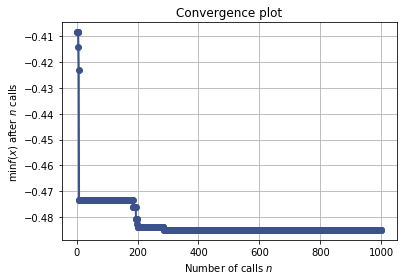

In [179]:
from skopt.plots import plot_convergence
import matplotlib
plot_convergence(res_gp)

In [180]:
scikitopt_model = MultinomialNB(alpha=0.199544475805408350055358823738060891628265380859375)

In [181]:
scikitopt_model.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=0.19954447580540835, class_prior=None, fit_prior=True)

In [182]:
preds = scikitopt_model.predict(vect.transform(X_test))
score = accuracy_score(y_test, preds)

In [183]:
print(score)

0.48


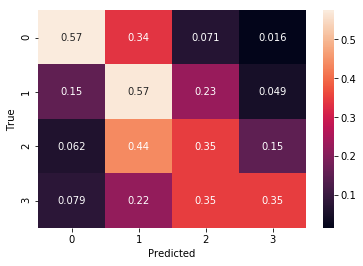

In [184]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, preds, normalize='true')
df_cm = pd.DataFrame(cm, range(4), range(4))
sn.heatmap(df_cm, annot=True)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()